In [6]:
import pandas as pd
import numpy as np
import psycopg2
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
pd.set_option("display.max_colwidth", 200)

In [7]:
conn = psycopg2.connect(host="localhost",database="mimic", user="postgres", password='postgres', port = '5432')
cursor = conn.cursor()

In [8]:
# explore fluid input and echo
sql = """
SELECT *
  FROM mimiciii.test_echo_fluid
  """
df = pd.read_sql_query(sql, conn)

In [9]:
df.describe()

,subject_id,pulmhtn,dm,esrd,isdead,age_of_death,days_after_icu_admit_death,days_after_discharge_death,tv_pulm_htn,tv_tr,...,lv_diastolic,lv_systolic,lv_wall,rv_cavity,rv_diastolic_fluid,rv_systolic,rv_wall,daily_input_ml,daily_output_ml,daily_balance_ml
count,3676.000000,3676.000000,3676.000000,3676.0,3676.000000,810.000000,810.000000,810.000000,660.000000,3362.000000,...,194.000000,3188.000000,2880.000000,3306.000000,42.0,3464.000000,176.000000,3676.000000,3676.000000,3676.000000
mean,46351.513602,0.037541,0.289445,0.0,0.220348,75.585185,366.671605,358.582716,0.872727,-0.070791,...,-1.154639,-0.115433,0.152083,-0.055051,1.0,-0.018476,0.238636,3877.893482,2236.731230,1641.162253
std,28780.548909,0.190109,0.453567,0.0,0.414538,53.988790,581.878641,582.167487,0.872188,5.390029,...,8.762071,3.808958,4.037829,3.284585,0.0,2.435825,0.427466,2474.165300,1258.610681,2522.058303
min,36.000000,0.000000,0.000000,0.0,0.000000,18.000000,0.000000,-4.000000,0.000000,-50.000000,...,-50.000000,-50.000000,-50.000000,-50.000000,1.0,-50.000000,0.000000,0.000000,0.000000,-7750.000000
25%,22578.000000,0.000000,0.000000,0.0,0.000000,53.000000,6.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,2223.575670,1375.000000,33.409533
50%,43866.500000,0.000000,0.000000,0.0,0.000000,68.000000,54.000000,42.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,3518.875000,2059.500000,1389.851195
75%,70605.000000,0.000000,1.000000,0.0,0.000000,79.000000,513.000000,509.000000,2.000000,1.000000,...,1.000000,0.000000,1.000000,0.000000,1.0,0.000000,0.000000,5106.000000,2818.000000,2828.750000
max,99922.000000,1.000000,1.000000,0.0,1.000000,309.000000,2956.000000,2952.000000,3.000000,3.000000,...,1.000000,3.000000,3.000000,2.000000,1.0,3.000000,1.000000,23322.959261,10520.000000,18224.959261


# lv_systolic = 3 means severely depression LV ejection fraction (<30%)

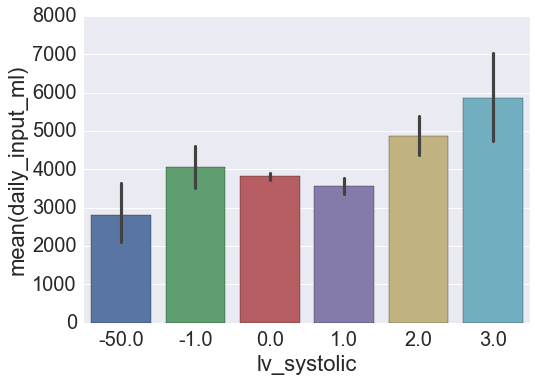

In [10]:
sns.set(font_scale=2)
sns.barplot(x="lv_systolic", y="daily_input_ml", data=df)

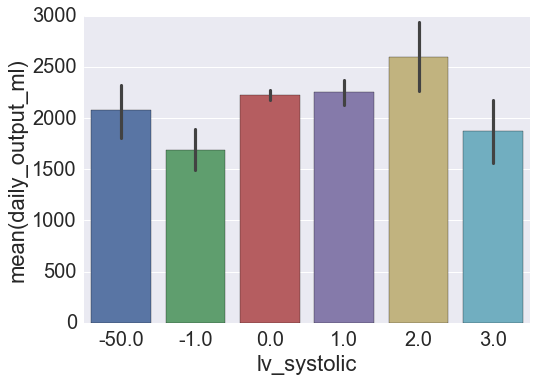

In [11]:
sns.barplot(x="lv_systolic", y="daily_output_ml", data=df)

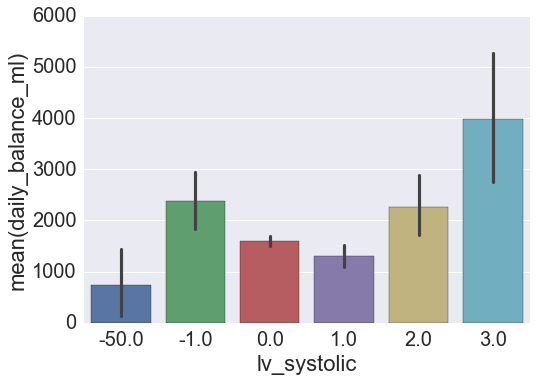

In [12]:
sns.barplot(x="lv_systolic", y="daily_balance_ml", data=df)

# lv_dialystolic = 1 means LV diastolic dysfunction

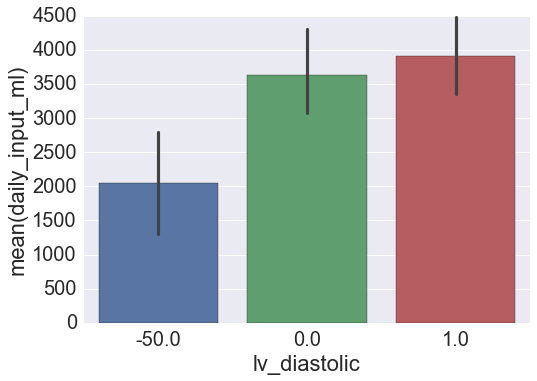

In [13]:
sns.barplot(x="lv_diastolic", y="daily_input_ml", data=df)

In [14]:
df.columns

Index([u'subject_id', u'charttime', u'echo_chartdate', u'ea_chartdate',
       u'pulmhtn', u'dm', u'esrd', u'isdead', u'age_of_death',
       u'days_after_icu_admit_death', u'days_after_discharge_death', u'status',
       u'tv_pulm_htn', u'tv_tr', u'lv_cavity', u'lv_diastolic', u'lv_systolic',
       u'lv_wall', u'rv_cavity', u'rv_diastolic_fluid', u'rv_systolic',
       u'rv_wall', u'daily_input_ml', u'daily_output_ml', u'daily_balance_ml'],
      dtype='object')

# rv_systolic = 3 means severe RV wall hypokinesis

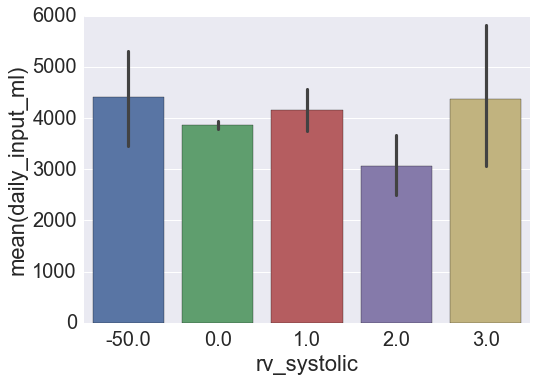

In [15]:
sns.barplot(x="rv_systolic", y="daily_input_ml", data=df)

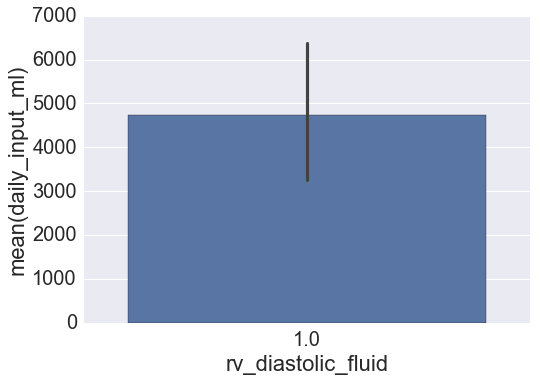

In [16]:
sns.barplot(x="rv_diastolic_fluid", y="daily_input_ml", data=df)

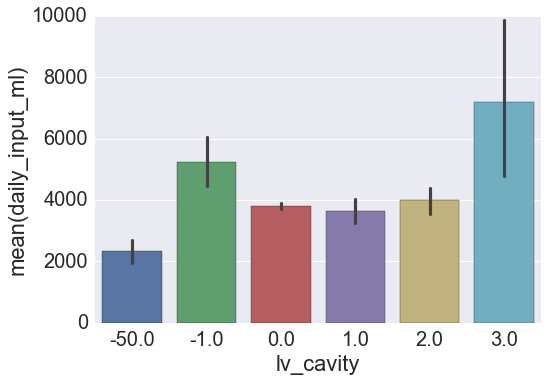

In [17]:
sns.barplot(x="lv_cavity", y="daily_input_ml", data=df)

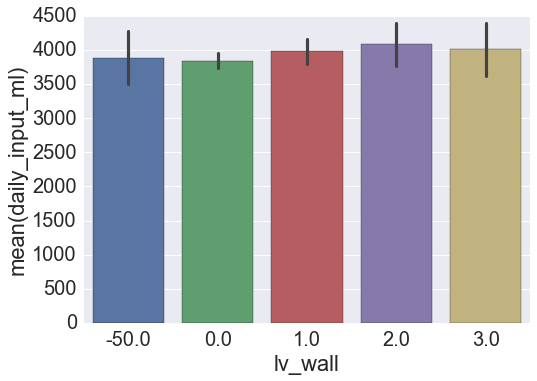

In [18]:
sns.barplot(x="lv_wall", y="daily_input_ml", data=df)

In [19]:
# explore fluid input and echo
sql = """
SELECT *
  FROM mimiciii.test_echo_fluid2
  """
df = pd.read_sql_query(sql, conn)

In [20]:
df.head()

,row_id,charttime,icustay_id,hadm_id,subject_id,intime,outtime,chronic_dialysis_flg,eage,egender,...,before_rowid,op_to_icu,icu_to_op,time_filter,age_filter,echo_seq,day_wrt_echo,daily_input_ml,daily_output_ml,daily_balance_ml
0,67805,2131-05-04 10:41:00,280987,182104,36,2131-05-04 10:29:14,2131-05-05 13:07:03,False,69.0,M,...,NaN,NaT,NaT,True,True,1,0,3001.0,1885.0,1116.0
1,67805,2131-05-04 10:41:00,280987,182104,36,2131-05-04 10:29:14,2131-05-05 13:07:03,False,69.0,M,...,NaN,NaT,NaT,True,True,1,1,508.0,1201.0,-693.0
2,67118,2113-02-15 17:20:00,216609,116009,62,2113-02-15 00:20:44,2113-02-17 20:09:46,False,68.0,M,...,NaN,NaT,NaT,True,True,1,0,2781.0,698.0,2083.0
3,67118,2113-02-15 17:20:00,216609,116009,62,2113-02-15 00:20:44,2113-02-17 20:09:46,False,68.0,M,...,NaN,NaT,NaT,True,True,1,1,505.0,1525.0,-1020.0
4,67118,2113-02-15 17:20:00,216609,116009,62,2113-02-15 00:20:44,2113-02-17 20:09:46,False,68.0,M,...,NaN,NaT,NaT,True,True,1,2,335.5,730.0,-394.5


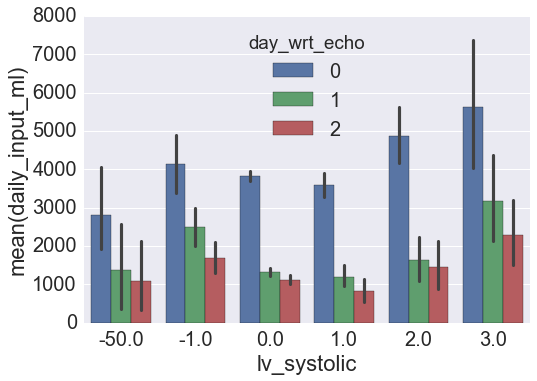

In [21]:
# for echos at ICU start, looking at fluid input post echo day 0, 1, and 2
# we can see that day 0 has the greatest fluid input, most likely for resuscitation
# patients with LV systolic dysfunction are getting more fluid input... could be due to confounding factor
# perhaps patients with more LV systolic dysfunction are sicker and require more fluids. adjust with APACHE??
sns.barplot(x="lv_systolic", y="daily_input_ml", hue ="day_wrt_echo", data=df[df.day_wrt_echo.isin([0, 1, 2])])

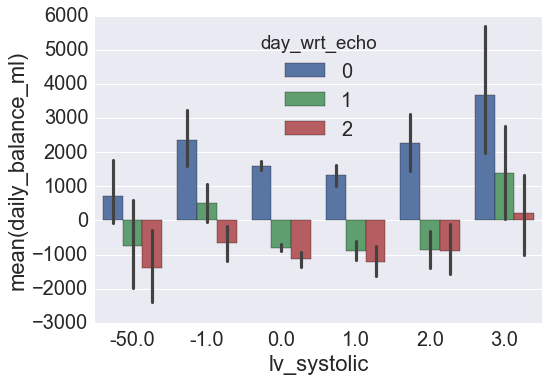

In [22]:
sns.barplot(x="lv_systolic", y="daily_balance_ml", hue ="day_wrt_echo", data=df[df.day_wrt_echo.isin([0, 1, 2])])

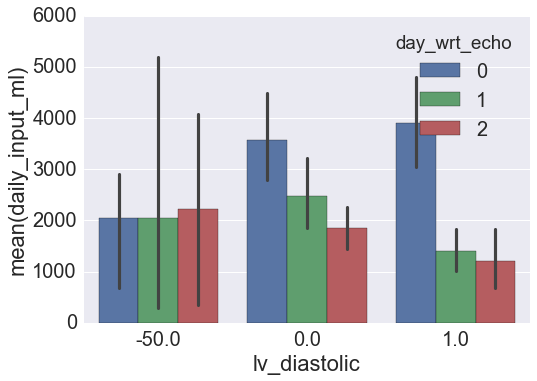

In [23]:
sns.barplot(x="lv_diastolic", y="daily_input_ml", hue ="day_wrt_echo", data=df[df.day_wrt_echo.isin([0, 1, 2])])

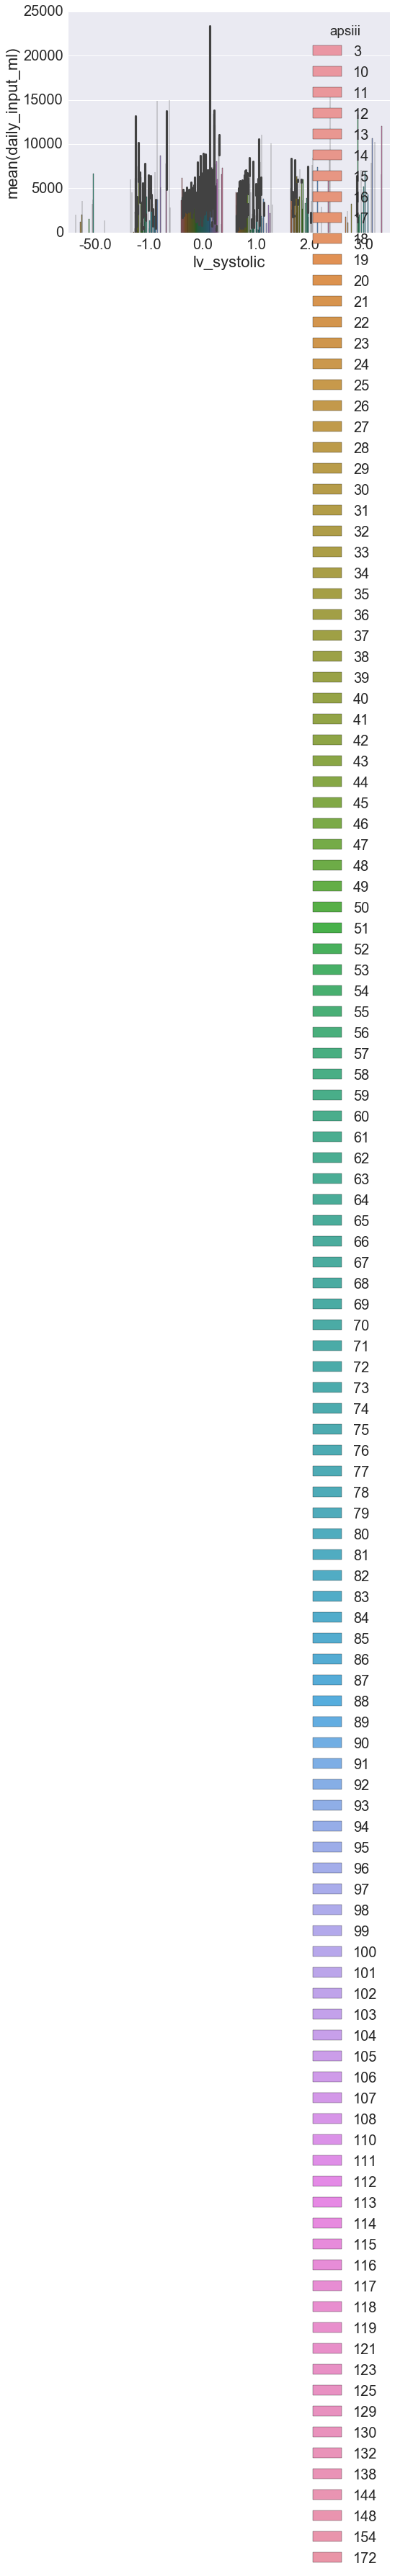

In [29]:
sns.barplot(x="lv_systolic", y="daily_input_ml", hue = "apsiii", data=df[df.day_wrt_echo.isin([0])])

In [35]:
df[df.day_wrt_echo.isin([0, 1, 2])].groupby(['day_wrt_echo']).count()

,row_id,charttime,icustay_id,hadm_id,subject_id,intime,outtime,chronic_dialysis_flg,eage,egender,...,after_rowid,before_rowid,op_to_icu,icu_to_op,time_filter,age_filter,echo_seq,daily_input_ml,daily_output_ml,daily_balance_ml
day_wrt_echo,,,,,,,,,,,,,,,,,,,,,
0,1838,1838,1838,1838,1838,1838,1838,1838,1799,1799,...,180,120,180,120,1838,1838,1838,1838,1838,1838
1,1685,1685,1685,1685,1685,1685,1685,1685,1649,1649,...,160,113,160,113,1685,1685,1685,1685,1685,1685
2,784,784,784,784,784,784,784,784,765,765,...,56,50,56,50,784,784,784,784,784,784


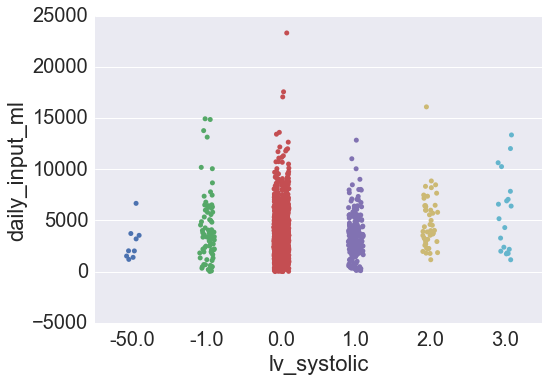

In [30]:
sns.stripplot(x="lv_systolic", y="daily_input_ml", data=df[df.day_wrt_echo.isin([0])], jitter = True)

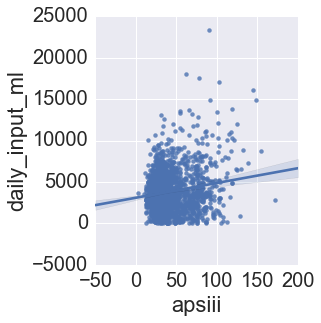

In [31]:
sns.lmplot(x="apsiii", y="daily_input_ml", data=df[df.day_wrt_echo.isin([0])])

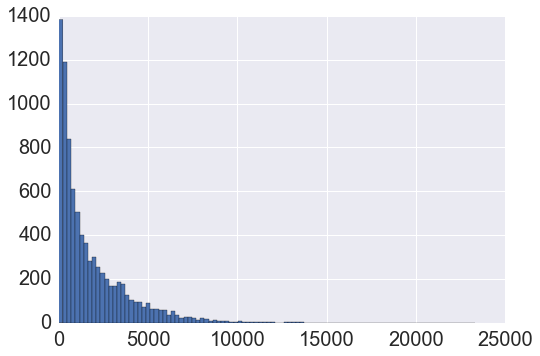

In [38]:
df.daily_input_ml.hist(bins = 100)

In [40]:
df.daily_input_ml.quantile([0.1, 0.9])

0.1     121.383234
0.9    4543.606859
Name: daily_input_ml, dtype: float64